In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
import numpy as np
from collections import OrderedDict
import numpy as np
import datetime as dt

In [92]:
folderPath = 'C:\\Users\\Benjamin\\Desktop\\Storm_allyears\\Processed_Storm_Data.csv'
df = pd.read_csv(folderPath)
print(df)

        Unnamed: 0    EVENT_TYPE        NAME                DATE  \
0                0       Tornado     WASHITA  28-APR-50 14:45:00   
1                1       Tornado    COMANCHE  29-APR-50 15:30:00   
2                2       Tornado      LEHIGH  05-JUL-50 18:00:00   
3                3       Tornado     DAUPHIN  05-JUL-50 18:30:00   
4                4       Tornado    CRAWFORD  24-JUL-50 14:40:00   
5                5       Tornado       BUCKS  29-AUG-50 16:00:00   
6                6       Tornado   LANCASTER  04-NOV-50 17:00:00   
7                7       Tornado       BERKS  04-NOV-50 17:30:00   
8                8       Tornado      HUGHES  15-SEP-50 17:45:00   
9                9       Tornado   PITTSBURG  16-SEP-50 01:30:00   
10              10       Tornado    CIMARRON  01-OCT-50 21:00:00   
11              11       Tornado    NUCKOLLS  22-JUN-50 21:00:00   
12              12       Tornado    OKLAHOMA  27-FEB-50 10:20:00   
13              13       Tornado   PITTSBURG  27

In [93]:
cols = ['DEATHS', 'INJURIES', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS']
df.loc[df.EVENT_TYPE == 'Hurricane', cols].describe()

,DEATHS,INJURIES,DAMAGE_PROPERTY,DAMAGE_CROPS
count,1095.000000,1095.00000,1.095000e+03,1.095000e+03
mean,9.844749,23.30411,8.463289e+07,4.947466e+06
std,200.404252,725.61165,4.516554e+08,2.502597e+07
min,0.000000,0.00000,0.000000e+00,0.000000e+00
25%,0.000000,0.00000,9.375000e+04,0.000000e+00
50%,0.000000,0.00000,8.000000e+05,0.000000e+00
75%,0.000000,0.00000,1.000000e+07,1.000000e+05
max,6380.000000,24000.00000,1.000000e+10,5.000000e+08


In [94]:
cols = ['DEATHS', 'INJURIES', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS']
for event in df.EVENT_TYPE.unique():
    print(event)
    print(df.loc[df.EVENT_TYPE == event, cols].describe())

Tornado
             DEATHS      INJURIES  DAMAGE_PROPERTY  DAMAGE_CROPS
count  59431.000000  59431.000000     5.943100e+04  5.943100e+04
mean       0.855160      1.625381     1.102774e+06  7.704717e+03
std       12.550245     21.446544     2.027743e+07  4.228017e+05
min        0.000000      0.000000     0.000000e+00  0.000000e+00
25%        0.000000      0.000000     0.000000e+00  0.000000e+00
50%        0.000000      0.000000     2.000000e+04  0.000000e+00
75%        0.000000      0.000000     1.100000e+05  0.000000e+00
max     1160.000000   3030.000000     2.800000e+09  7.000000e+07
Hail
              DEATHS       INJURIES  DAMAGE_PROPERTY  DAMAGE_CROPS
count  208241.000000  208241.000000     2.082410e+05  2.082410e+05
mean        0.000341       0.006776     1.300541e+05  1.439957e+04
std         0.093461       0.450293     7.538210e+06  4.816691e+05
min         0.000000       0.000000     0.000000e+00  0.000000e+00
25%         0.000000       0.000000     0.000000e+00  0.000000e+00


In [95]:
for event in df.EVENT_TYPE.unique():
    numberOfDeaths= str(df[df['EVENT_TYPE'] == event]['DEATHS'].max())
    print(event+': '+numberOfDeaths)

Tornado: 1160
Hail: 40
Thunderstorm: 110
Winter Storm: 70
Flood: 200
High Wind: 80
Other: 190
Wildfire: 140
Drought: 0
Heat: 1313
Tropical Storm: 220
Hurricane: 6380
Tsunami: 32


In [96]:
for event in df.EVENT_TYPE.unique():
    propertyDamage= str(df[df['EVENT_TYPE'] == event]['DAMAGE_PROPERTY'].mean())
    print(event+': '+propertyDamage)

Tornado: 1102774.283623025
Hail: 130054.1114381894
Thunderstorm: 40847.01642232914
Winter Storm: 95103.81265864924
Flood: 1617657.0545265982
High Wind: 200969.35545883205
Other: 979717.7189702038
Wildfire: 2711188.39045443
Drought: 79634.18166270078
Heat: 2331.797589537567
Tropical Storm: 18857406.186470382
Hurricane: 84632886.12785389
Tsunami: 4935400.0


In [97]:
for event in df.EVENT_TYPE.unique():
    propertyDamage= str(df[df['EVENT_TYPE'] == event]['DAMAGE_CROPS'].mean())
    print(event+': '+propertyDamage)

Tornado: 7704.71656206357
Hail: 14399.56881689965
Thunderstorm: 4196.10898185119
Winter Storm: 7592.275810411552
Flood: 85917.74972099789
High Wind: 15365.640551323902
Other: 84224.3607056909
Wildfire: 84005.92282305153
Drought: 591333.231707317
Heat: 20298.74348234892
Tropical Storm: 231475.99018576936
Hurricane: 4947465.570776256
Tsunami: 666.6666666666666


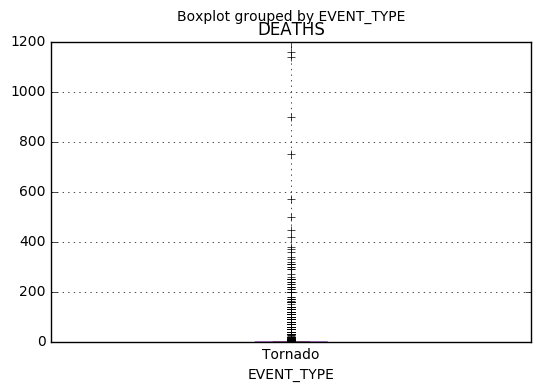

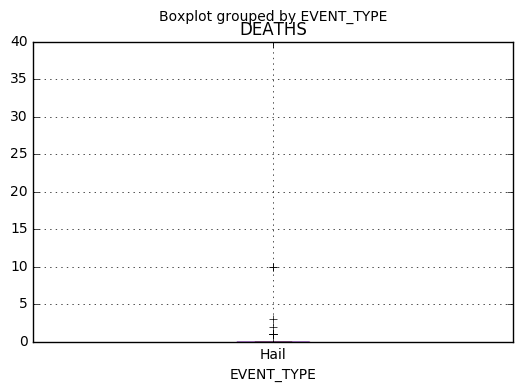

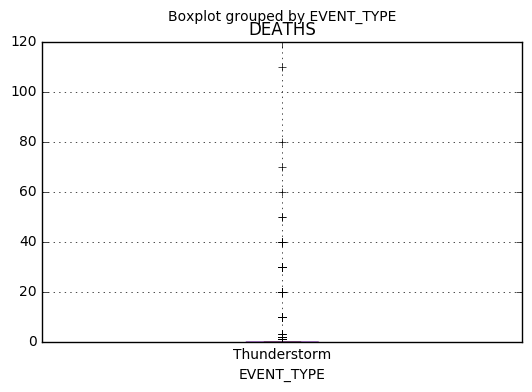

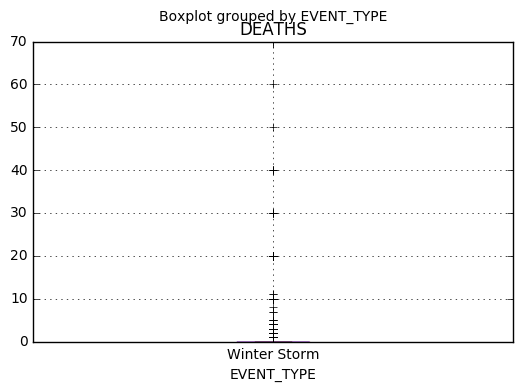

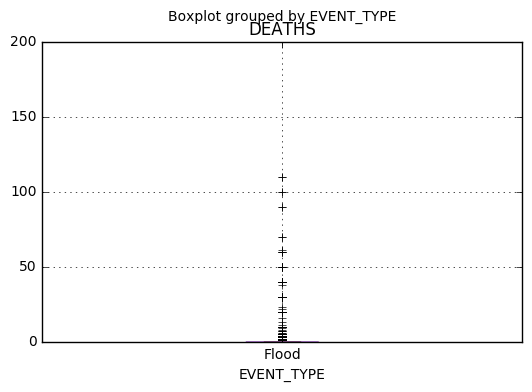

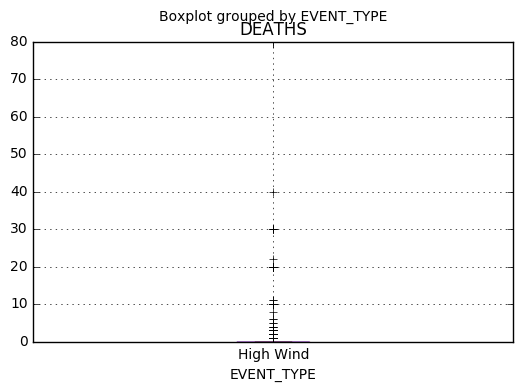

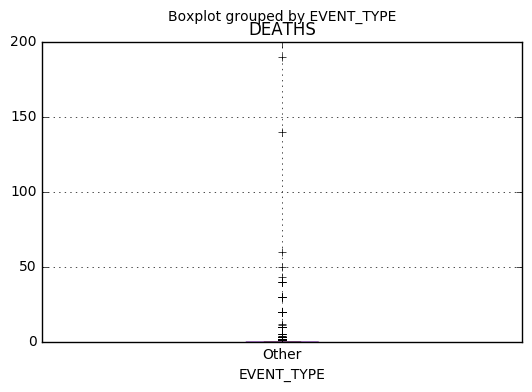

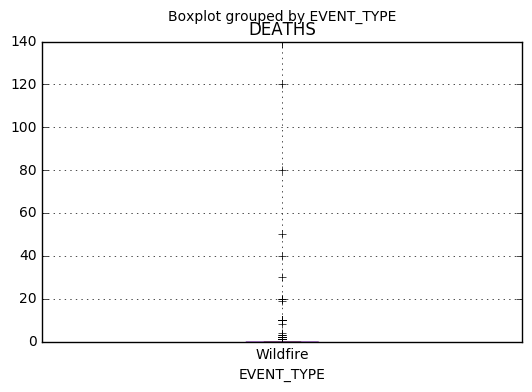

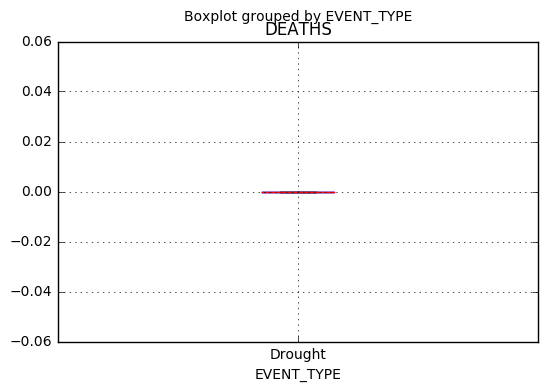

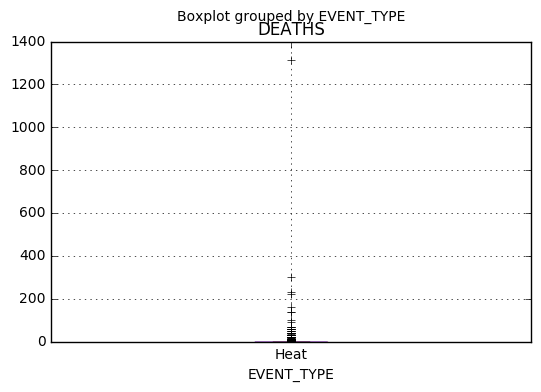

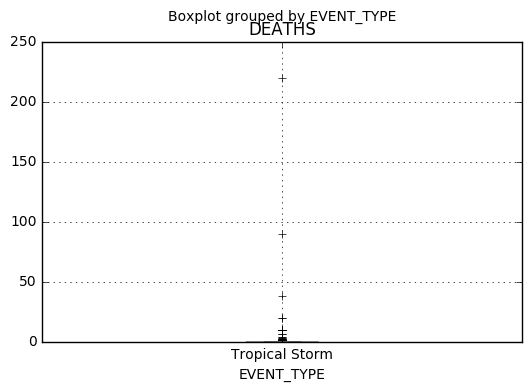

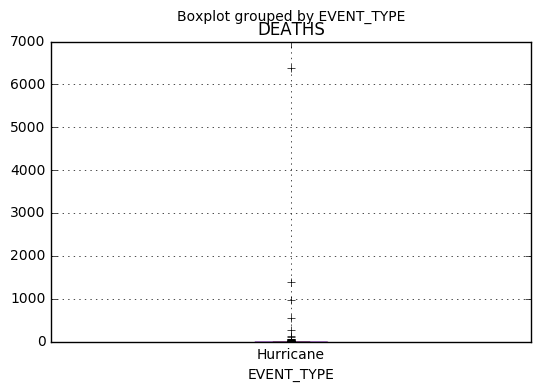

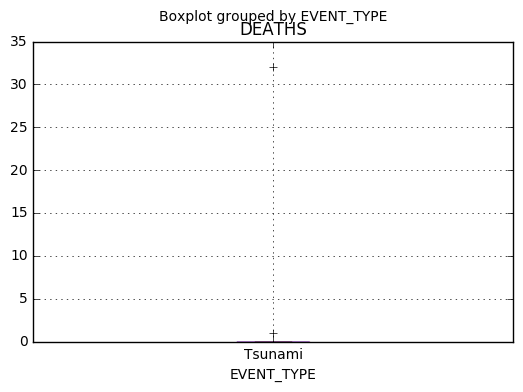

In [98]:
for event in df.EVENT_TYPE.unique():
    df[df['EVENT_TYPE'] == event].boxplot(by = 'EVENT_TYPE', column = 'DEATHS')
    
plt.show()
#flashflood, tornado, heat, hurricane, excessive heat have the highest number of deaths consistently

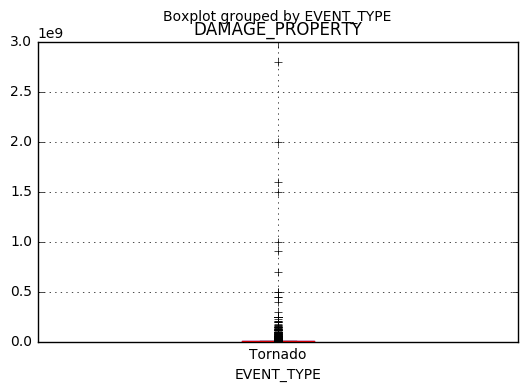

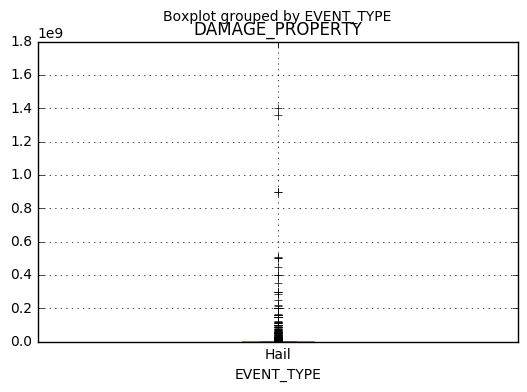

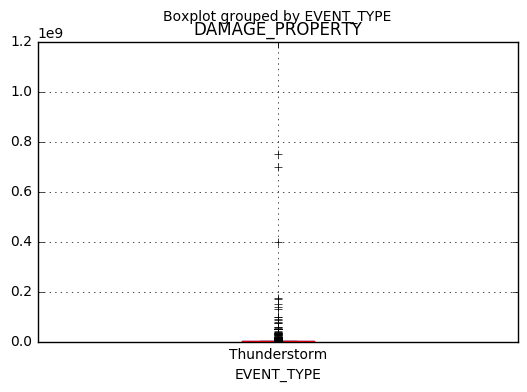

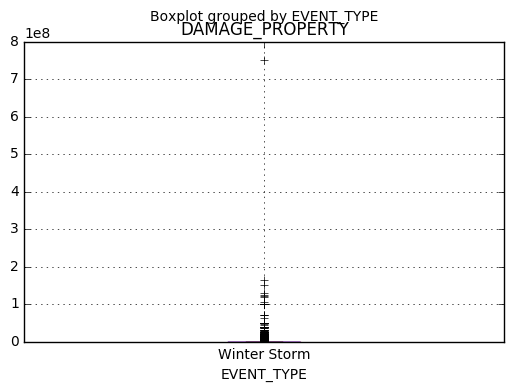

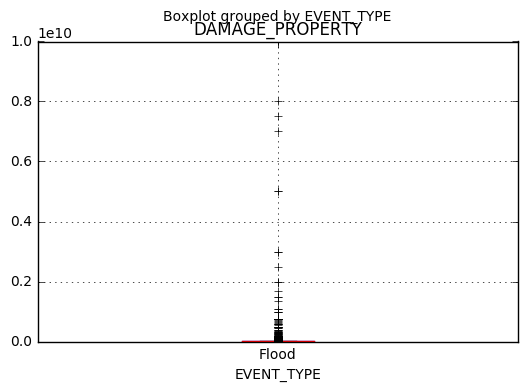

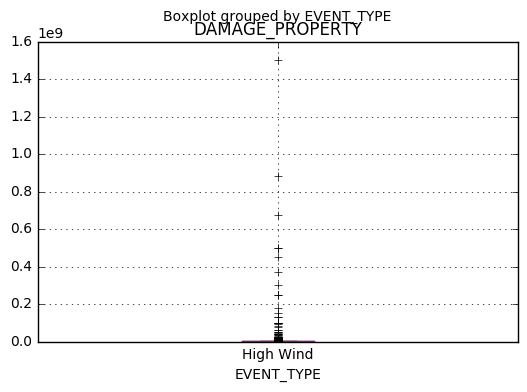

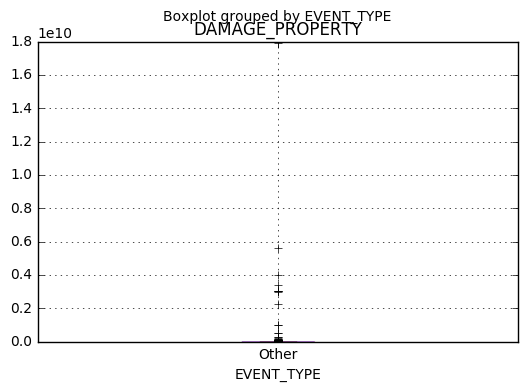

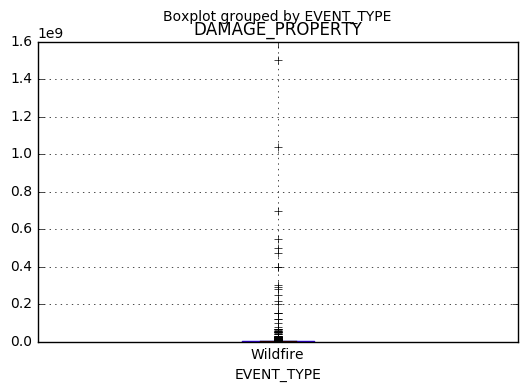

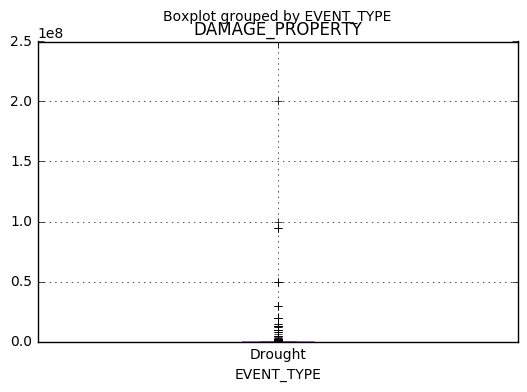

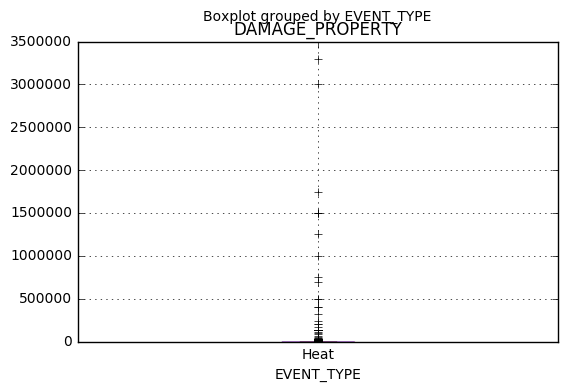

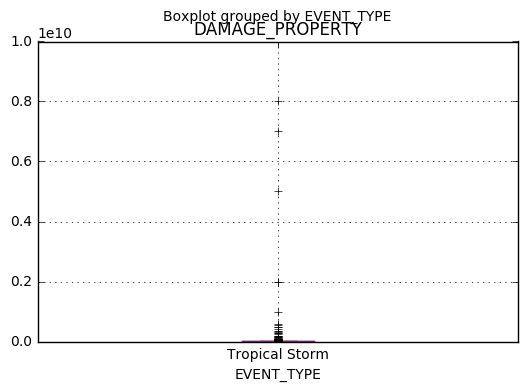

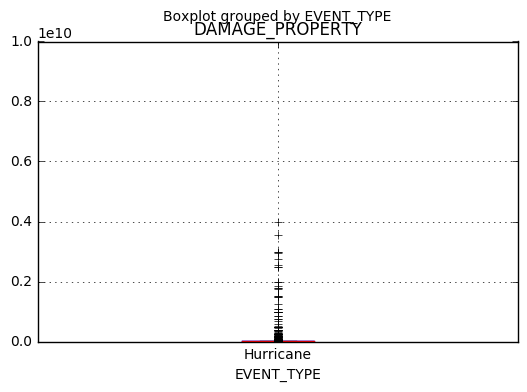

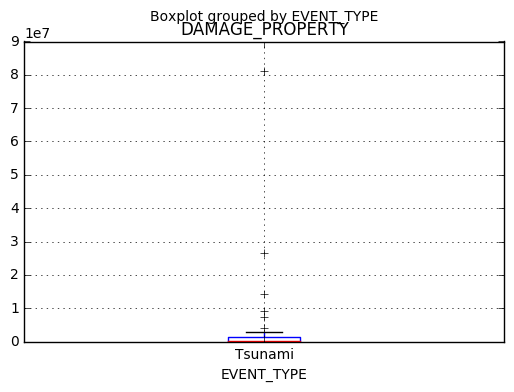

In [99]:
for event in df.EVENT_TYPE.unique():
    df[df['EVENT_TYPE'] == event].boxplot(by = 'EVENT_TYPE', column = 'DAMAGE_PROPERTY')
    
plt.show()

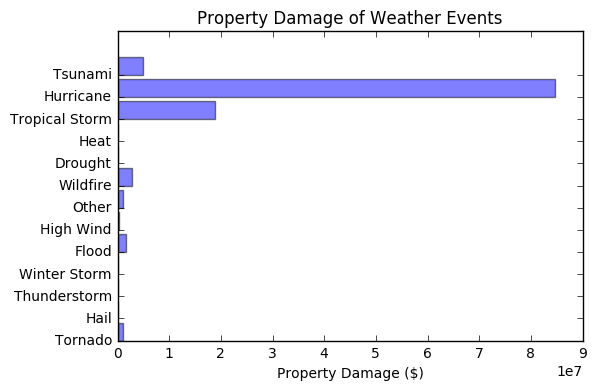

In [100]:
Average_Deaths = tuple(df[df['EVENT_TYPE'] == event]['DAMAGE_PROPERTY'].mean() for event in df.EVENT_TYPE.unique())
Events = tuple(df.EVENT_TYPE.unique())

objects = Events
y_pos = np.arange(len(objects))

plt.barh(y_pos, Average_Deaths, alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Property Damage ($)')
plt.title('Property Damage of Weather Events')
 
plt.show()

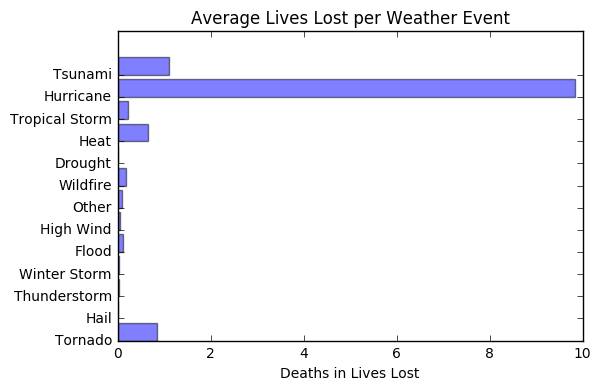

In [101]:
Average_Deaths = tuple(df[df['EVENT_TYPE'] == event]['DEATHS'].mean() for event in df.EVENT_TYPE.unique())
Events = tuple(df.EVENT_TYPE.unique())

objects = Events
y_pos = np.arange(len(objects))

plt.barh(y_pos, Average_Deaths, alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Deaths in Lives Lost')
plt.title('Average Lives Lost per Weather Event')
 
plt.show()

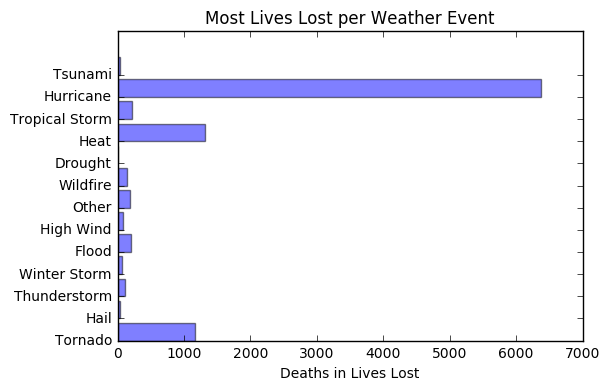

In [102]:
Average_Deaths = tuple(df[df['EVENT_TYPE'] == event]['DEATHS'].max() for event in df.EVENT_TYPE.unique())
Events = tuple(df.EVENT_TYPE.unique())

objects = Events
y_pos = np.arange(len(objects))

plt.barh(y_pos, Average_Deaths, alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Deaths in Lives Lost')
plt.title('Most Lives Lost per Weather Event')
 
plt.show()